<a href="https://colab.research.google.com/github/CarlottaVattolo/Esame_ML/blob/main/Versione_finale_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt




In [21]:
# Caricamento del dataset
FFILE='./Mercedes_benz.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.githubusercontent.com/CarlottaVattolo/Esame_ML/main/Mercedes_benz.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.githubusercontent.com/CarlottaVattolo/Esame_ML/main/Mercedes_benz.csv"

File already exists
File is readable


In [22]:
# Carico i dati in un dataset usando la libreria pandas
data = pd.read_csv('Mercedes_benz.csv')

# Visualizzo le prime righe del file
print(data.head())

# Verifica la presenza di valori mancanti
missing_values = data.isnull().sum()
print(missing_values)

# Rimuovo le righe con valori mancanti
data.dropna(inplace=True)

# Normalizzazione dei dati
columns_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Trasformazione delle variabili temporali
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Visualizzo le prime righe del dataset processato
print(data.head())


         Date       Open       High        Low      Close  Adj Close   Volume
0  2020-01-02  41.092484  41.845215  40.971882  41.566578  33.846729  2973654
1  2020-01-03  41.296261  41.362801  40.302322  40.813847  33.233799  4014262
2  2020-01-06  40.202515  40.593433  39.703465  40.593433  33.054317  3441396
3  2020-01-07  40.797215  41.208927  40.680767  40.917816  33.318455  2816618
4  2020-01-08  40.589275  41.167339  40.489468  41.146545  33.504704  2659070
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
        Date      Open      High       Low     Close  Adj Close    Volume  \
0 2020-01-02 -1.150422 -1.143309 -1.112128 -1.116731  33.846729 -0.305804   
1 2020-01-03 -1.136221 -1.176866 -1.158940 -1.169185  33.233799  0.087289   
2 2020-01-06 -1.212439 -1.230385 -1.200808 -1.184544  33.054317 -0.129113   
3 2020-01-07 -1.170998 -1.187570 -1.132481 -1.161940  33.318455 -0.365124   
4 2020-01-08 -1.185488 -1.190

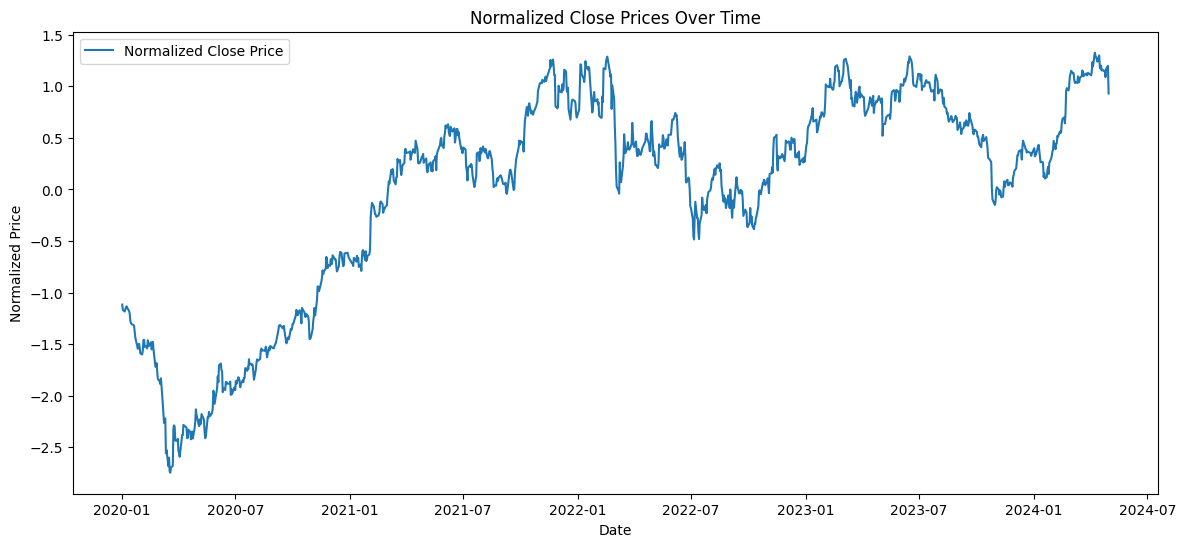

In [35]:
# Grafico dei prezzi (colonna 'Close') nel dataset
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Close'], label='Normalized Close Price')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Close Prices Over Time')
plt.legend()
plt.show()


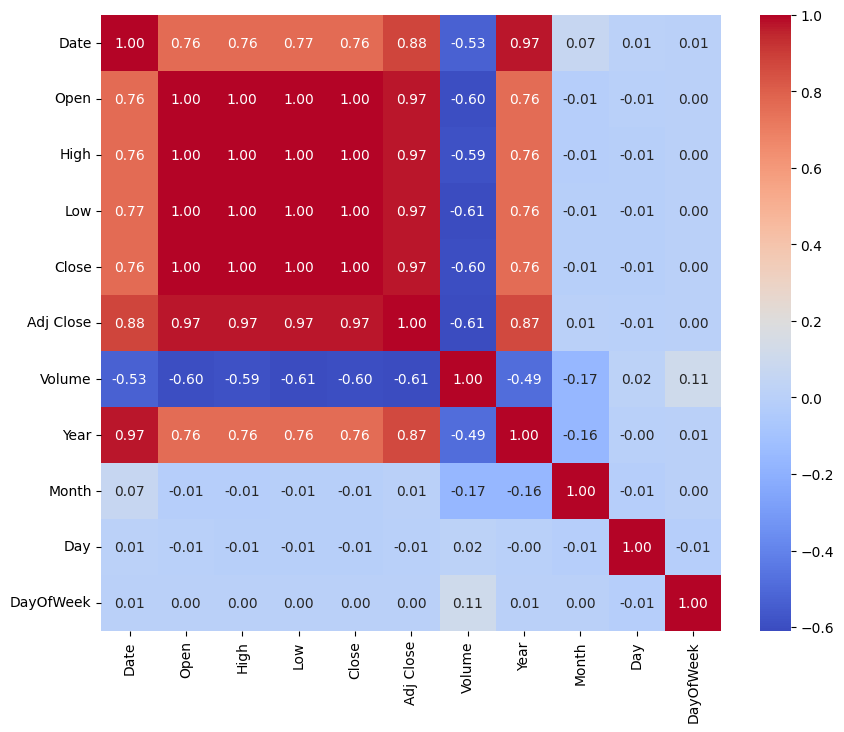

In [23]:
# Calcolare la matrice di correlazione
correlation_matrix = data.corr()
# Visualizzare la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Creazione delle sequenze temporali dal dataset normalizzato e trasformato. Utilizzeremo una finestra temporale di 10 giorni per prevedere il giorno successivo.



In [24]:
# Funzione per creare sequenze temporali
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Utilizzeremo solo la colonna 'Close' per la previsione
seq_length = 10
X, y = create_sequences(data[['Close']].values, seq_length)

# Divisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(876, 10, 1) (219, 10, 1) (876, 1) (219, 1)


In [25]:
# FCNN Model
fcnn_model = Sequential([
    Flatten(input_shape=(seq_length, 1)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

fcnn_model.compile(optimizer='adam', loss='mse')
fcnn_model.summary()

# Train the FCNN model
fcnn_history = fcnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Predict with FCNN
y_pred_fcnn = fcnn_model.predict(X_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
28/28 [==============================] - 1s 17ms/step - loss: 0.1365 - val_loss: 0.0237
Epoch 2/50
28/28 [==============================] - 0

In [26]:
# Calcolo delle metriche per FCNN
fcnn_mse = mean_squared_error(y_test, y_pred_fcnn)
fcnn_rmse = np.sqrt(fcnn_mse)
fcnn_mae = mean_absolute_error(y_test, y_pred_fcnn)
fcnn_mape = np.mean(np.abs((y_test - y_pred_fcnn) / y_test)) * 100
fcnn_r_squared = r2_score(y_test, y_pred_fcnn)

metrics_fcnn = {
    "MSE": fcnn_mse,
    "RMSE": fcnn_rmse,
    "MAE": fcnn_mae,
    "MAPE": fcnn_mape,
    "R-squared": fcnn_r_squared
}

print(metrics_fcnn)

{'MSE': 0.004524748986058725, 'RMSE': 0.06726625443756122, 'MAE': 0.05063409309180333, 'MAPE': 39.1624136885122, 'R-squared': 0.9701696099282522}


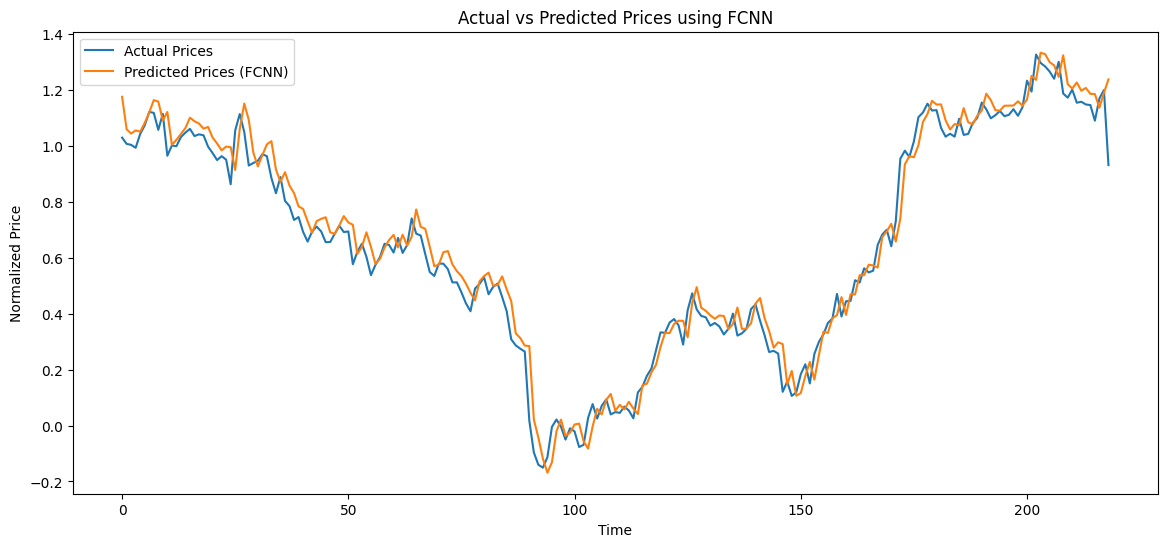

In [27]:
# Plot dei prezzi effettivi vs predetti (FCNN)
plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices')
plt.plot(range(len(y_test)), y_pred_fcnn, label='Predicted Prices (FCNN)')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Actual vs Predicted Prices using FCNN')
plt.legend()
plt.show()


RNN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# RNN Model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Predict with RNN
y_pred_rnn = rnn_model.predict(X_test)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
28/28 [==============================] - 2s 18ms/step - loss: 1.0546 - val_loss: 0.0477
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 0.0367 - val_loss: 0.0047
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 0.0131 - val_loss: 0.0049
Epoch 4/50
28/28 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.0043
Epoch 5/50
28/28 [=====

In [29]:
# Calcolo delle metriche per RNN
rnn_mse = mean_squared_error(y_test, y_pred_rnn)
rnn_rmse = np.sqrt(rnn_mse)
rnn_mae = mean_absolute_error(y_test, y_pred_rnn)
rnn_mape = np.mean(np.abs((y_test - y_pred_rnn) / y_test)) * 100
rnn_r_squared = r2_score(y_test, y_pred_rnn)

metrics_rnn = {
    "MSE": rnn_mse,
    "RMSE": rnn_rmse,
    "MAE": rnn_mae,
    "MAPE": rnn_mape,
    "R-squared": rnn_r_squared
}

print(metrics_rnn)


{'MSE': 0.0037303565073949527, 'RMSE': 0.061076644532873224, 'MAE': 0.044295715527074314, 'MAPE': 35.316798607971805, 'R-squared': 0.9754068148166595}


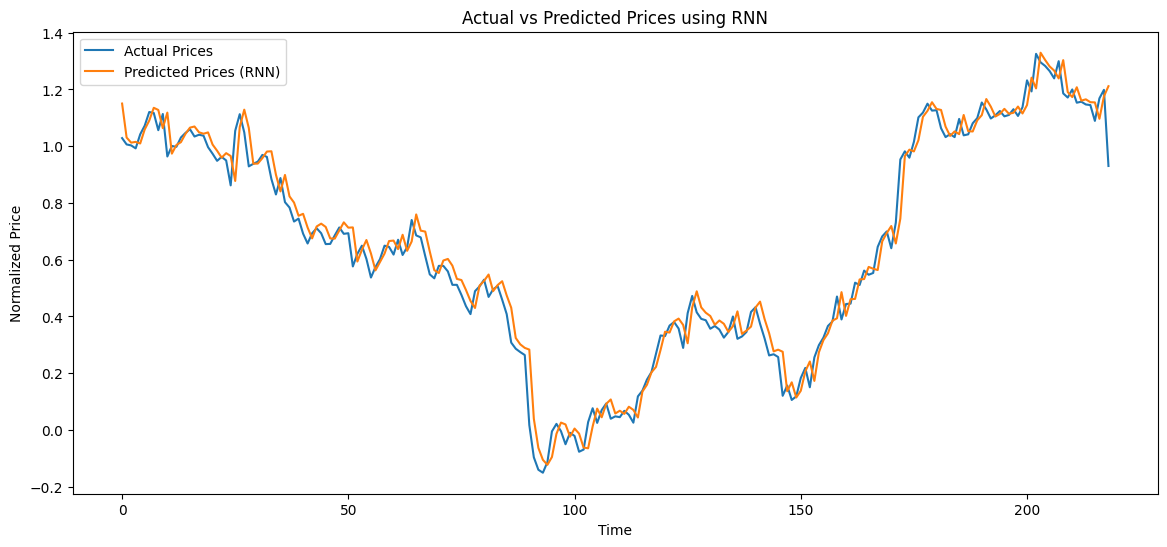

In [30]:
# Plot dei prezzi effettivi vs predetti (RNN)
plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices')
plt.plot(range(len(y_test)), y_pred_rnn, label='Predicted Prices (RNN)')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Actual vs Predicted Prices using RNN')
plt.legend()
plt.show()


SVM con Kernel PCA

In [31]:
from sklearn.decomposition import KernelPCA

# Reshape dei dati per Kernel PCA
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Applicazione di Kernel PCA
kpca = KernelPCA(n_components=10, kernel='rbf')
X_train_kpca = kpca.fit_transform(X_train_reshaped)
X_test_kpca = kpca.transform(X_test_reshaped)


In [34]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Implementazione e addestramento del modello SVM
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_kpca, y_train.ravel())

# Previsione con il modello SVM
y_pred_svm = svm_model.predict(X_test_kpca)

# Calcolo delle metriche
mse = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svm)
mape = np.mean(np.abs((y_test - y_pred_svm) / y_test)) * 100
r_squared = r2_score(y_test, y_pred_svm)

metrics_svm = {
    "MSE": mse,
    "RMSE": rmse
    "MAE": mae,
    "MAPE": mape,
    "R-squared": r_squared
}

print(metrics_svm)


{'MSE': 0.007390618336291121, 'RMSE': 0.08596870556365915, 'MAE': 0.06503931638887504, 'MAPE': 368.590219872796, 'R-squared': 0.9512757440197778}


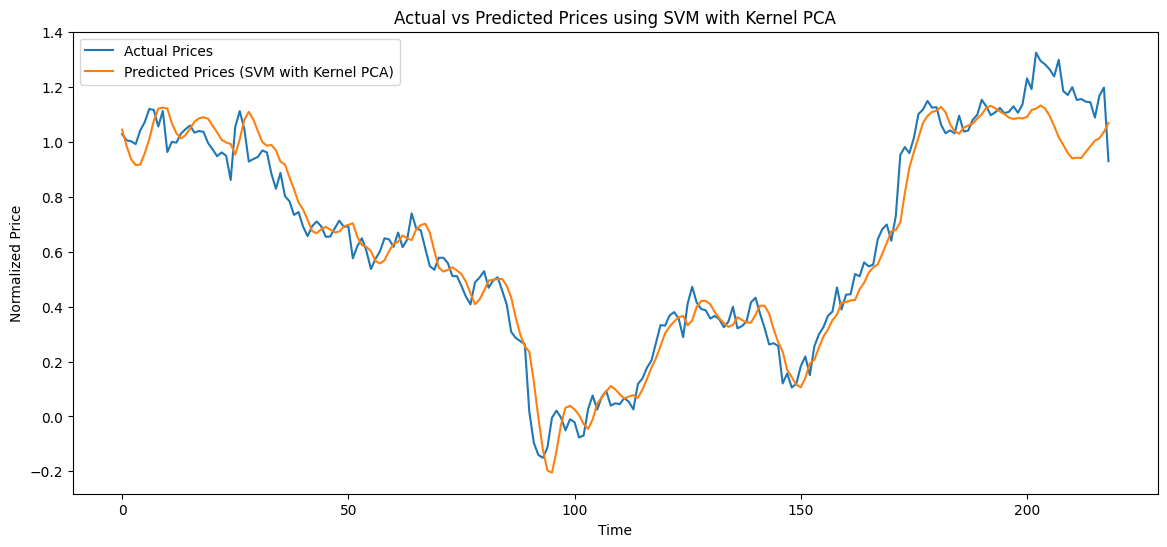

In [33]:
# Plot dei prezzi effettivi vs predetti
plt.figure(figsize=(14, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices')
plt.plot(range(len(y_test)), y_pred_svm, label='Predicted Prices (SVM with Kernel PCA)')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.title('Actual vs Predicted Prices using SVM with Kernel PCA')
plt.legend()
plt.show()


In [39]:
# Riassunto delle metriche in una tabella
metrics_df = pd.DataFrame({
    "SVM": metrics_svm,
    "FCNN": metrics_fcnn,
    "RNN": metrics_rnn
})

# Trasponi il DataFrame per visualizzare le metriche in colonne
metrics_df = metrics_df.T

# Stampa il DataFrame
print(metrics_df)

           MSE      RMSE       MAE        MAPE  R-squared
SVM   0.007391  0.085969  0.065039  368.590220   0.951276
FCNN  0.004525  0.067266  0.050634   39.162414   0.970170
RNN   0.003730  0.061077  0.044296   35.316799   0.975407


In questo esempio, il modello RNN sarebbe il migliore perché ha i valori più bassi di MSE, RMSE, MAE e MAPE, e il valore di R-squared più alto.